# 词嵌入模型上课案例

In [1]:
pip install --upgrade gensim

Note: you may need to restart the kernel to use updated packages.


# # 数据准备

In [2]:
#导入数据
import pandas as pd
df=pd.read_excel('text_analysis_ad.xlsx',index_col=0)
df

,index,商品名称,商品类别,出版年,广告文本,广告标题
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟"""
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也'
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花"""
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片"""
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友"""
...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产"""
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺"""
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果"""
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六"""


In [3]:
#分词
import jieba
#stopwords=open('',encoding='utf-8')
def clean_text(text):
    words=jieba.lcut(text)
    return ' '.join(words)
test=df['广告文本'][0]
clean_text(test)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/kk/ylyfvmrj6zv853wrvp3s_0180000gn/T/jieba.cache
Loading model cost 0.323 seconds.
Prefix dict has been built successfully.


'兰勃 脱白 脱勒 公司   五华 牌 香烟   佛及 尼埃 香烟     二十 枝装 每包 售 国币 大洋 二角   五十 枝装 每罐 售 国币 大洋   五角'

In [4]:
df['广告文本分词']=df['广告文本'].apply(clean_text)
df

,index,商品名称,商品类别,出版年,广告文本,广告标题,广告文本分词
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟""",兰勃 脱白 脱勒 公司 五华 牌 香烟 佛及 尼埃 香烟 二十 枝装 每包 ...
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也',讲求 卫生 为 人生 本性 天理 固然 也 人生 首贵 逐日 大便 通畅 有序 为 天然...
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花""","香味 馥郁 , 不让 名花 另 有 三 炮台 出售"
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片""",差肩 儿女 秀慧 康强 闽有 佳音 讃 羡 婴孩 自己 药片 每年 此际 小儿 ...
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友""",何以 亚士 北罗 是 妇女 们 的 腻友 ？ 各国 妇女 力证 亚士 北罗 药片 是 她们 ...
...,...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产""",安住 蚊烟香 臭虫 立毙 药粉 世界 第一名 产 安住 蚊烟香 蚊见 逃 慌...
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺""",眉色 清秀 气色 壮旺 此 第 威德 润肠 丸 之功 也 第 威德 润肠 丸系 ...
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果""",汤火 烫伤 立 攃 如意 膏 可免 严重 之 后果 皮肤 受伤 当以 灼烫 最 痛苦...
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六""",清血 解毒 六零 六 花柳 梅毒 瘰 * 疮 疖 癣疥 * * 及 筋骨 酸痛 四肢 麻...


# # 词向量模型

In [5]:
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [6]:
corpus=df['广告文本分词'].apply(lambda X: X.split()).tolist()#切分词语
for document in corpus[:10]:
    print(document)

['兰勃', '脱白', '脱勒', '公司', '五华', '牌', '香烟', '佛及', '尼埃', '香烟', '二十', '枝装', '每包', '售', '国币', '大洋', '二角', '五十', '枝装', '每罐', '售', '国币', '大洋', '五角']
['讲求', '卫生', '为', '人生', '本性', '天理', '固然', '也', '人生', '首贵', '逐日', '大便', '通畅', '有序', '为', '天然', '所当', '如此', '也', '如若', '大便', '不利', '大', '肠阻塞', '则', '胃失', '消化', '疾病', '头痛', '肝火', '上升', '胆汁', '不', '调', '口气', '积浊', '舌现', '黄苔', '诸恙', '接踵', '而', '起', '矣', '凡', '此皆须', '服用', '韦廉士', '大', '医生', '红色', '清导丸', '以利', '大便', '俾得', '体质', '强健', '百病', '不侵', '也况', '此丸', '之', '功力', '天然', '平和', '不尚', '霸烈', '广东省', '城', '医生', '学', '研究会', '*', '生', '先生', '来示', '云弟', '患大', '便秘', '结之症', '一月', '有余', '困苦', '万状', '难以', '言喻', '服用', '韦廉士', '红色', '清导丸', '数粒', '大便', '畅达', '于是', '常为', '服用', '身体', '爽健为', '半生', '以来', '所', '未有', '也', '如', '尊处', '无从', '购买', '韦廉士', '红色', '清导丸', '祈即', '邮票', '大洋', '六角', '至', '上海', '四川', '路', '九十六', '号', '韦廉士', '医生', '药局', '原班', '邮奉', '一瓶', '可', '也']
['香味', '馥郁', ',', '不让', '名花', '另', '有', '三', '炮台', '出售']
['差肩', '儿女', '秀慧', '康强', '闽有', '佳音', '讃', '羡', '婴孩

In [7]:
#训练词嵌入模型
from gensim.models import Word2Vec
corpus=df['广告文本分词'].apply(lambda X: X.split()).tolist()#切分词语
model=Word2Vec(
    corpus, #训练语料
    window=5,#训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size=300,#自定义训练向量维度
    min_count=1,#忽略所有总频数低于这个值的词语
    #workers=4,#用于训练的线程数
    epochs=5)#迭代

#保存训练好的模型
model.save('word2vec_ad.model')

In [8]:
word_list=model.wv.index_to_key#获取词汇表
word_vectors=model.wv[word_list]#获取词向量

#打印词汇表和对应的词向量
for word,vector in list(zip(word_list,word_vectors))[:5]:
    print(f'{word}:{vector}')

之:[-0.00872036  0.43445882  0.06829777  0.32768363 -0.03560211 -0.33964455
  0.20575306  1.0009667   0.08590803 -0.11735143  0.00919386 -0.39752725
 -0.03367421  0.11676728 -0.5510054  -0.3048689   0.23652028 -0.11632988
  0.08683522 -0.3165633  -0.31317806 -0.06526216  0.22700518 -0.02644469
  0.582087   -0.02150863 -0.6365976  -0.11297774 -0.4121786  -0.48609072
  0.09130784 -0.12608169  0.02885835 -0.24414504 -0.20702118  0.16500367
 -0.01813225 -0.4768116   0.05175908 -0.17401162 -0.20527825  0.0782783
 -0.16151465 -0.44622743  0.18987529  0.3606902   0.21436362  0.24154015
 -0.21812563  0.43206415  0.03094428 -0.03772776 -0.13954611  0.20305757
 -0.02032705  0.48627925  0.10758319 -0.0977421  -0.01376868  0.01411919
 -0.17969412 -0.20053315 -0.08675177  0.08416939  0.01685454  0.1855945
  0.14805701  0.02657877 -0.25369248 -0.02362994  0.03444213  0.3592259
  0.2954962  -0.5271876   0.07937106  0.26973605 -0.30542067 -0.08245996
  0.01046047  0.3121346   0.01373638 -0.64515984  0.

In [9]:
#检查嵌入模型中任意两个词向量的余弦相似度，即语义接近性
#余弦相似度的取值介于[-1，1]之间，-1表示语义完全相反，1表示语义完全相同，0表示毫无关系
#model.sv.similarity这个函数与np.dot(vector1,vector2)/(np.linalg.norm(vector1)*np.linalg.norm(vector2))输出的结果一样
print(model.wv.similarity('医生', '疼痛'))
print(model.wv.similarity('医生', '神经'))
print(model.wv.similarity('医生', '伤风'))
print(model.wv.similarity('疼痛', '神经'))
print(model.wv.similarity('疼痛', '伤风'))
print(model.wv.similarity('神经', '伤风'))

0.916411
0.8885133
0.90364194
0.99429274
0.9985553
0.9953312


# # 可视化

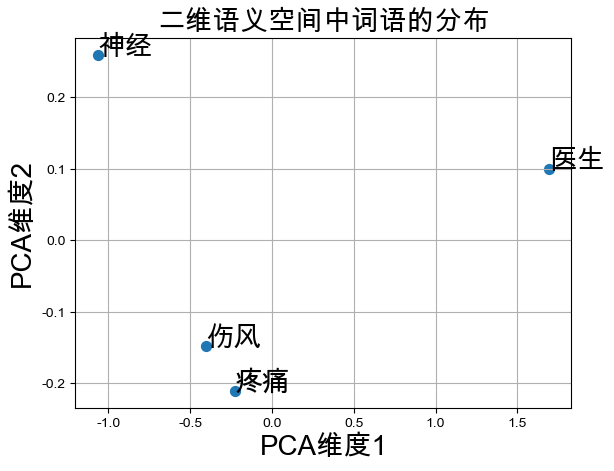

In [10]:
# 可视化

words = ['医生', '疼痛', '神经', '伤风']
vectors = [model.wv[word] for word in words]

from sklearn.decomposition import PCA     # 语义空间降维，用于展示词语在二维空间的相对位置

# 使用PCA进行降维
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(vectors)

import matplotlib.pyplot as plt     # 画图

# 绘制四个词语在二维空间的相对位置
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
plt.figure()

# 取PCA降维结果中所有行的第一列和第二列数据绘制散点图，设置点的大小为50
plt.scatter(pca_result[:, 0], pca_result[:, 1], s = 50)

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize = 20)

plt.xlabel('PCA维度1', fontsize = 20)
plt.ylabel('PCA维度2', fontsize = 20)
plt.title('二维语义空间中词语的分布', fontsize = 20)
plt.grid(True)
plt.show()

# 官方双减数据词嵌入分析

# # 数据准备

In [15]:
#导入数据
import pandas as pd
df=pd.read_excel('官方双减数据.xlsx',index_col=0).astype(str)
df

,标题链接,title,txt,content,content1,txt1,文 号
标题,,,,,,,
"...中央办公厅 国务院办公厅印发《关于进一步减轻义务教育阶段学生作业负担和校外培训负担的意见》,相似信息 1条",http://www.moe.gov.cn/jyb_xxgk/moe_1777/moe_17...,公开,nan,nan,教育部-2021-07-24,nan,nan
坚决贯彻中央决策部署 深入推进“双减”工作——教育部有关负责人就《关于进一步减轻义务教育阶段学生作业负担和校外培训负担的意见》答记者问,http://www.moe.gov.cn/jyb_xwfb/s271/202107/t20...,新闻,全链条推进“双减”工作。三是综合治理。建立“双减”工作专门协 。 问：“双减”工作的总体目标...,教育部-2021-07-24,nan,nan,nan
专家解读《关于进一步减轻义务教育阶段学生作业负担和校外培训负担的意见》,http://www.moe.gov.cn/jyb_xwfb/s5147/202107/t2...,新闻,“双减”目标如何实现 2021-07-26 来源：《中国青年报》收藏 担和校外培训负担（以下...,教育部-2021-07-26,nan,nan,nan
教育部办公厅关于学习推广北京等地经验做法进一步做好“双减”工作的通知,http://www.moe.gov.cn/srcsite/A29/202109/t2021...,公开,nan,nan,教育部-2021-08-26,。 现将北京等四地近期开展“双减”工作的典型做法印发给你们， 福建省“点题整治”校外培训 4...,教监管厅函〔2021〕5号
以人民为中心，将“双减”落到实处——专家解读《关于进一步减轻义务教育阶段学生作业负担和校外培训负担的意见》,http://www.moe.gov.cn/jyb_xwfb/s5147/202107/t2...,新闻,怎样将“双减”工作落到实处 记者采访了多位专家。 “双减”事关国之大计党之大计 以人民为中心...,教育部-2021-07-26,nan,nan,nan
...,...,...,...,...,...,...,...
强化培训机构预收费风险管控 坚决防止侵害群众利益行为——教育部有关部门负责人就《关于加强校外培训机构预收费监管工作的通知》答记者问,http://www.moe.gov.cn/jyb_xwfb/s271/202110/t20...,新闻,于进一步减轻义务教育阶段学生作业负担和校外培训负担的意见》（ 务院办公厅印发《意见》，对“双...,教育部-2021-10-29,nan,nan,nan
教育部办公厅关于开展县域义务教育优质均衡创建工作的通知,http://www.moe.gov.cn/srcsite/A06/s3321/202112...,公开,nan,nan,教育部-2021-11-29,群众所急所需所盼，全面落实“双减”任务，大力深化综合改革，加 综合改革的良好氛围，在落实“双...,教基厅函〔2021〕43号
教育部办公厅关于做好2022年暑期校外培训治理有关工作的通知,http://www.moe.gov.cn/srcsite/A29/202206/t2022...,公开,nan,nan,教育部-2022-06-23,教育局： 2022年暑期是“双减”后的第二个暑期。前期校外培 一、专门作出安排部署。各地教育...,教监管厅函〔2022〕12号


In [16]:
#分词
import jieba
#stopwords=open('',encoding='utf-8')
def clean_text(text):
    words=jieba.lcut(text)
    return ' '.join(words)
test=df['txt'][0]
clean_text(test)

'nan'

In [17]:
df['txt分词']=df['txt'].apply(clean_text)
df

,标题链接,title,txt,content,content1,txt1,文 号,txt分词
标题,,,,,,,,
"...中央办公厅 国务院办公厅印发《关于进一步减轻义务教育阶段学生作业负担和校外培训负担的意见》,相似信息 1条",http://www.moe.gov.cn/jyb_xxgk/moe_1777/moe_17...,公开,nan,nan,教育部-2021-07-24,nan,nan,nan
坚决贯彻中央决策部署 深入推进“双减”工作——教育部有关负责人就《关于进一步减轻义务教育阶段学生作业负担和校外培训负担的意见》答记者问,http://www.moe.gov.cn/jyb_xwfb/s271/202107/t20...,新闻,全链条推进“双减”工作。三是综合治理。建立“双减”工作专门协 。 问：“双减”工作的总体目标...,教育部-2021-07-24,nan,nan,nan,全 链条 推进 “ 双减 ” 工作 。 三是 综合治理 。 建立 “ 双减 ” 工作 专门 ...
专家解读《关于进一步减轻义务教育阶段学生作业负担和校外培训负担的意见》,http://www.moe.gov.cn/jyb_xwfb/s5147/202107/t2...,新闻,“双减”目标如何实现 2021-07-26 来源：《中国青年报》收藏 担和校外培训负担（以下...,教育部-2021-07-26,nan,nan,nan,“ 双减 ” 目标 如何 实现 2021 - 07 - 26 来源 ： 《 中国青年...
教育部办公厅关于学习推广北京等地经验做法进一步做好“双减”工作的通知,http://www.moe.gov.cn/srcsite/A29/202109/t2021...,公开,nan,nan,教育部-2021-08-26,。 现将北京等四地近期开展“双减”工作的典型做法印发给你们， 福建省“点题整治”校外培训 4...,教监管厅函〔2021〕5号,nan
以人民为中心，将“双减”落到实处——专家解读《关于进一步减轻义务教育阶段学生作业负担和校外培训负担的意见》,http://www.moe.gov.cn/jyb_xwfb/s5147/202107/t2...,新闻,怎样将“双减”工作落到实处 记者采访了多位专家。 “双减”事关国之大计党之大计 以人民为中心...,教育部-2021-07-26,nan,nan,nan,怎样 将 “ 双减 ” 工作 落到实处 记者 采访 了 多位 专家 。 “ 双减 ”...
...,...,...,...,...,...,...,...,...
强化培训机构预收费风险管控 坚决防止侵害群众利益行为——教育部有关部门负责人就《关于加强校外培训机构预收费监管工作的通知》答记者问,http://www.moe.gov.cn/jyb_xwfb/s271/202110/t20...,新闻,于进一步减轻义务教育阶段学生作业负担和校外培训负担的意见》（ 务院办公厅印发《意见》，对“双...,教育部-2021-10-29,nan,nan,nan,于 进一步 减轻 义务教育 阶段 学生 作业负担 和 校外 培训 负担 的 意见 》 （ ...
教育部办公厅关于开展县域义务教育优质均衡创建工作的通知,http://www.moe.gov.cn/srcsite/A06/s3321/202112...,公开,nan,nan,教育部-2021-11-29,群众所急所需所盼，全面落实“双减”任务，大力深化综合改革，加 综合改革的良好氛围，在落实“双...,教基厅函〔2021〕43号,nan
教育部办公厅关于做好2022年暑期校外培训治理有关工作的通知,http://www.moe.gov.cn/srcsite/A29/202206/t2022...,公开,nan,nan,教育部-2022-06-23,教育局： 2022年暑期是“双减”后的第二个暑期。前期校外培 一、专门作出安排部署。各地教育...,教监管厅函〔2022〕12号,nan


# # 词向量模型

In [18]:
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [19]:
corpus=df['txt分词'].apply(lambda X: X.split()).tolist()#切分词语
for document in corpus[:10]:
    print(document)

['nan']
['全', '链条', '推进', '“', '双减', '”', '工作', '。', '三是', '综合治理', '。', '建立', '“', '双减', '”', '工作', '专门', '协', '。', '问', '：', '“', '双减', '”', '工作', '的', '总体目标', '是', '什么', '答', '：', '“', '双减', '”', '工作', '的', '总体', '...']
['“', '双减', '”', '目标', '如何', '实现', '2021', '-', '07', '-', '26', '来源', '：', '《', '中国青年报', '》', '收藏', '担', '和', '校外', '培训', '负担', '（', '以下', '简称', '“', '双减', '”', '）', '工作', '，', '取得', '了', '积极', '成效', '。', '但', '...']
['nan']
['怎样', '将', '“', '双减', '”', '工作', '落到实处', '记者', '采访', '了', '多位', '专家', '。', '“', '双减', '”', '事关', '国之', '大计', '党', '之', '大计', '以', '人民', '为', '中心', '，', '将', '“', '双减', '”', '落到实处', '2021', '-', '07', '-', '26', '来源', '：', '《', '中国', '教育', '报', '》', '收藏', '...']
['，', '指导', '学校', '做好', '“', '双减', '”', '有关', '工作', '。', '落实', '“', '双减', '”', '工作', '，', '地方', '教育部', '实', '。', '确保', '“', '双减', '”', '政策', '落实', '落地', '“', '推进', '实施', '双减', '工作', '是', '党', '中', '...']
['版权所有', '中华人民共和国教育部', '中文', '域名', '教育部', '政务', '京', 'ICP', '...']
['，', '明确', '家校', 

In [20]:
#训练词嵌入模型
from gensim.models import Word2Vec
corpus=df['txt分词'].apply(lambda X: X.split()).tolist()#切分词语
model=Word2Vec(
    corpus, #训练语料
    window=5,#训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size=300,#自定义训练向量维度
    min_count=1,#忽略所有总频数低于这个值的词语
    #workers=4,#用于训练的线程数
    epochs=5)#迭代

#保存训练好的模型
model.save('word2vec_txt.model')

In [21]:
word_list=model.wv.index_to_key#获取词汇表
word_vectors=model.wv[word_list]#获取词向量

#打印词汇表和对应的词向量
for word,vector in list(zip(word_list,word_vectors))[:5]:
    print(f'{word}:{vector}')

“:[ 0.01141517  0.43207726  0.07609046  0.25743377 -0.074099   -0.44477808
  0.3136589   1.0116547  -0.10862114 -0.21371825  0.11103503 -0.20067295
  0.03897095  0.340914   -0.30148992 -0.3542088   0.36424232 -0.19201176
 -0.14088061 -0.15519021 -0.15511549 -0.20871708  0.40146396  0.10697364
  0.17764139 -0.08354118 -0.56453586  0.06309805 -0.33103538 -0.53138304
  0.22711574 -0.32369453  0.12388653  0.06029909 -0.11144684  0.26275355
  0.26958787 -0.51561254 -0.2667938   0.04274645 -0.2514327   0.05430558
  0.16228345 -0.38460732  0.3603452   0.49475423 -0.05179419  0.02539009
 -0.0490124   0.22102937 -0.04669823  0.17624994 -0.24182431  0.1654841
  0.00279633  0.3883243   0.08261872 -0.05105604  0.16210295 -0.07967306
 -0.11854621 -0.11701808  0.05258481  0.27555     0.07048276  0.21493009
  0.00946584  0.23255834 -0.26968375 -0.01409988  0.14278422  0.4030166
  0.40216982 -0.3099279   0.21010238  0.04122377 -0.3510707   0.05401986
 -0.10865854  0.34866503 -0.3213829  -0.48830998  0

In [22]:
#检查嵌入模型中任意两个词向量的余弦相似度，即语义接近性
#余弦相似度的取值介于[-1，1]之间，-1表示语义完全相反，1表示语义完全相同，0表示毫无关系
#model.sv.similarity这个函数与np.dot(vector1,vector2)/(np.linalg.norm(vector1)*np.linalg.norm(vector2))输出的结果一样
print(model.wv.similarity('双减', '教育'))
print(model.wv.similarity('双减', '党'))
print(model.wv.similarity('双减', '人民'))
print(model.wv.similarity('党', '教育'))
print(model.wv.similarity('人民', '教育'))
print(model.wv.similarity('党', '人民'))

0.9998293
0.9983436
0.99887395
0.9981856
0.9987774
0.9970068


# # 可视化

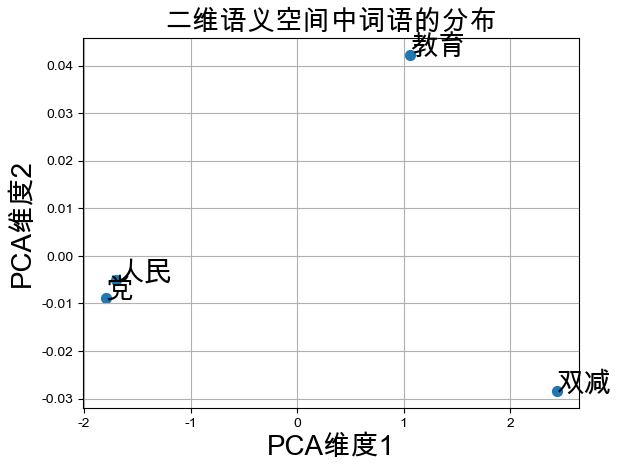

In [23]:
# 可视化

words = ['双减', '教育', '党', '人民']
vectors = [model.wv[word] for word in words]

from sklearn.decomposition import PCA     # 语义空间降维，用于展示词语在二维空间的相对位置

# 使用PCA进行降维
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(vectors)

import matplotlib.pyplot as plt     # 画图

# 绘制四个词语在二维空间的相对位置
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
plt.figure()

# 取PCA降维结果中所有行的第一列和第二列数据绘制散点图，设置点的大小为50
plt.scatter(pca_result[:, 0], pca_result[:, 1], s = 50)

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize = 20)

plt.xlabel('PCA维度1', fontsize = 20)
plt.ylabel('PCA维度2', fontsize = 20)
plt.title('二维语义空间中词语的分布', fontsize = 20)
plt.grid(True)
plt.show()

# 民间双减数据词嵌入分析

# # 数据准备

In [24]:
#导入数据
import pandas as pd
df=pd.read_excel('民间双减数据.xlsx',index_col=0).astype(str)
df

,标题链接,m-box-col,头像,weibo-text,time,m-ctrl-box,m-ctrl-box1,m-ctrl-box2,from,m-icon,缩略图
标题,,,,,,,,,,,
"南京北京东路王波聊双减,双减盐_,付大双减肥中,更多",javascript:void(0),nan,nan,nan,nan,nan,nan,nan,nan,nan,https://tvax3.sinaimg.cn/crop.0.0.862.862.180/...
"小土大橙子,#双减#","javascript:void(0),javascript:;",#双减#0讨论 0阅读,https://tvax1.sinaimg.cn/crop.0.0.640.640.180/...,该说不说，最该减的就是语文吧。答案又不确定，考那么难是要干啥，课本一滴水考试一片海，不明确就...,1-18 18:45,59,237,1573,来自 iPhone 12,https://h5.sinaimg.cn/upload/108/1866/2022/11/...,https://wx3.sinaimg.cn/thumb180/0024cZx9ly8hgy...
美杜莎麻麻,javascript:void(0),2,https://tvax4.sinaimg.cn/crop.0.0.1080.1080.18...,现在小学写得少，还有个减负双减的原因。 不过感觉今年好像没减那样厉害了，这学期有作业有单元测...,1-4 11:29,2,92,88,来自 nova8 我由我掌镜,https://h5.sinaimg.cn/upload/108/1866/2022/11/...,nan
晏凌羊,javascript:void(0),3,https://tva2.sinaimg.cn/crop.0.0.750.750.180/5...,网友私信（后附胖羊回复）： 羊羊好，匿名公开咨询。 非常同意你写的”生活在这片土地上，不...,1-25 00:05,3,6,64,来自 微博网页版,https://h5.sinaimg.cn/upload/108/1866/2022/11/...,nan
"初见旧城以西,#长安区教育局#","javascript:void(0),javascript:;",#长安区教育局#0讨论 0阅读,https://tvax1.sinaimg.cn/crop.0.0.1058.1058.18...,#长安区教育局##兴国中学##双减政策# 西安市长安区兴国中学提前开学，无视国家的寒假放假计...,2-19 16:28,18,16,83,来自 iPhone客户端,nan,https://wx2.sinaimg.cn/thumb180/0024cZx9ly8gyd...
...,...,...,...,...,...,...,...,...,...,...,...
蔓越小莓,javascript:void(0),转发,https://tvax1.sinaimg.cn/crop.0.0.512.512.180/...,今天K3要去参观隔壁的小学咯！去看看你不会过的那种生活这个片区的公立可卷了，乐乐那批没赶上双...,4-8 08:17,转发,评论,赞,来自 iPhone 15 Pro Max,https://h5.sinaimg.cn/upload/108/1866/2022/11/...,https://wx2.sinaimg.cn/orj360/78417387gy1hoj3v...
陕西都市热线,javascript:void(0),转发,https://tvax1.sinaimg.cn/crop.0.0.512.512.180/...,【西安市教育局通报违规校外培训行为】西安市碑林区、长安区、高陵区严格落实《校外培训行政处罚暂...,4-7 18:11,转发,评论,赞,来自 微博网页版,https://h5.sinaimg.cn/upload/108/1866/2022/11/...,https://wx2.sinaimg.cn/orj360/6d146ea8ly1hoifk...
李雲天塔罗观自在,javascript:void(0),转发,https://tvax3.sinaimg.cn/crop.0.0.609.609.180/...,学校抉择方向塔罗预测：现在的家长越来越重视孩子的教育，从上幼儿园之前就想把最好的都给孩子。每...,4-7 17:23,转发,评论,赞,来自 预测请聊天iPad mini,https://h5.sinaimg.cn/upload/108/1866/2022/11/...,nan


In [25]:
#分词
import jieba
#stopwords=open('',encoding='utf-8')
def clean_text(text):
    words=jieba.lcut(text)
    return ' '.join(words)
test=df['weibo-text'][0]
clean_text(test)

'nan'

In [26]:
df['weibo-text分词']=df['weibo-text'].apply(clean_text)
df

,标题链接,m-box-col,头像,weibo-text,time,m-ctrl-box,m-ctrl-box1,m-ctrl-box2,from,m-icon,缩略图,weibo-text分词
标题,,,,,,,,,,,,
"南京北京东路王波聊双减,双减盐_,付大双减肥中,更多",javascript:void(0),nan,nan,nan,nan,nan,nan,nan,nan,nan,https://tvax3.sinaimg.cn/crop.0.0.862.862.180/...,nan
"小土大橙子,#双减#","javascript:void(0),javascript:;",#双减#0讨论 0阅读,https://tvax1.sinaimg.cn/crop.0.0.640.640.180/...,该说不说，最该减的就是语文吧。答案又不确定，考那么难是要干啥，课本一滴水考试一片海，不明确就...,1-18 18:45,59,237,1573,来自 iPhone 12,https://h5.sinaimg.cn/upload/108/1866/2022/11/...,https://wx3.sinaimg.cn/thumb180/0024cZx9ly8hgy...,该 说 不 说 ， 最 该减 的 就是 语文 吧 。 答案 又 不 确定 ， 考 那么 难是...
美杜莎麻麻,javascript:void(0),2,https://tvax4.sinaimg.cn/crop.0.0.1080.1080.18...,现在小学写得少，还有个减负双减的原因。 不过感觉今年好像没减那样厉害了，这学期有作业有单元测...,1-4 11:29,2,92,88,来自 nova8 我由我掌镜,https://h5.sinaimg.cn/upload/108/1866/2022/11/...,nan,现在 小学 写得少 ， 还有 个 减负 双减 的 原因 。 不过 感觉 今年 好像 没减...
晏凌羊,javascript:void(0),3,https://tva2.sinaimg.cn/crop.0.0.750.750.180/5...,网友私信（后附胖羊回复）： 羊羊好，匿名公开咨询。 非常同意你写的”生活在这片土地上，不...,1-25 00:05,3,6,64,来自 微博网页版,https://h5.sinaimg.cn/upload/108/1866/2022/11/...,nan,网友 私信 （ 后 附胖羊 回复 ） ： 羊羊 好 ， 匿名 公开 咨询 。 ...
"初见旧城以西,#长安区教育局#","javascript:void(0),javascript:;",#长安区教育局#0讨论 0阅读,https://tvax1.sinaimg.cn/crop.0.0.1058.1058.18...,#长安区教育局##兴国中学##双减政策# 西安市长安区兴国中学提前开学，无视国家的寒假放假计...,2-19 16:28,18,16,83,来自 iPhone客户端,nan,https://wx2.sinaimg.cn/thumb180/0024cZx9ly8gyd...,# 长安区 教育局 ## 兴国 中学 ## 双减 政策 # 西安市 长安区 兴国 中学 ...
...,...,...,...,...,...,...,...,...,...,...,...,...
蔓越小莓,javascript:void(0),转发,https://tvax1.sinaimg.cn/crop.0.0.512.512.180/...,今天K3要去参观隔壁的小学咯！去看看你不会过的那种生活这个片区的公立可卷了，乐乐那批没赶上双...,4-8 08:17,转发,评论,赞,来自 iPhone 15 Pro Max,https://h5.sinaimg.cn/upload/108/1866/2022/11/...,https://wx2.sinaimg.cn/orj360/78417387gy1hoj3v...,今天 K3 要 去 参观 隔壁 的 小学 咯 ！ 去 看看 你 不会 过 的 那种 生活 这...
陕西都市热线,javascript:void(0),转发,https://tvax1.sinaimg.cn/crop.0.0.512.512.180/...,【西安市教育局通报违规校外培训行为】西安市碑林区、长安区、高陵区严格落实《校外培训行政处罚暂...,4-7 18:11,转发,评论,赞,来自 微博网页版,https://h5.sinaimg.cn/upload/108/1866/2022/11/...,https://wx2.sinaimg.cn/orj360/6d146ea8ly1hoifk...,【 西安市 教育局 通报 违规 校外 培训 行为 】 西安市 碑林区 、 长安区 、 高 陵...
李雲天塔罗观自在,javascript:void(0),转发,https://tvax3.sinaimg.cn/crop.0.0.609.609.180/...,学校抉择方向塔罗预测：现在的家长越来越重视孩子的教育，从上幼儿园之前就想把最好的都给孩子。每...,4-7 17:23,转发,评论,赞,来自 预测请聊天iPad mini,https://h5.sinaimg.cn/upload/108/1866/2022/11/...,nan,学校 抉择 方向 塔罗 预测 ： 现在 的 家长 越来越 重视 孩子 的 教育 ， 从 上 ...


# # 词向量模型

In [27]:
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [28]:
corpus=df['weibo-text分词'].apply(lambda X: X.split()).tolist()#切分词语
for document in corpus[:10]:
    print(document)

['nan']
['该', '说', '不', '说', '，', '最', '该减', '的', '就是', '语文', '吧', '。', '答案', '又', '不', '确定', '，', '考', '那么', '难是', '要', '干', '啥', '，', '课本', '一滴水', '考试', '一片', '海', '，', '不', '明确', '就是', '造成', '恐慌', '和', '疯狂', '内卷', '的', '因素', '之一', '#', '双减', '#']
['现在', '小学', '写得少', '，', '还有', '个', '减负', '双减', '的', '原因', '。', '不过', '感觉', '今年', '好像', '没减', '那样', '厉害', '了', '，', '这', '学期', '有', '作业', '有', '单元', '测验', '有', '安排', '期末', '复习', '书面', '考试', '的', '学校', '，', '好像', '比', '之前', '多', '了', '一些', '。', '评论', '区', '聊聊', '，', '从', '去年', '到', '今年', '学校', '作业', '考试', '等', '安排', '有', '变化', '么', '？']
['网友', '私信', '（', '后', '附胖羊', '回复', '）', '：', '羊羊', '好', '，', '匿名', '公开', '咨询', '。', '非常', '同意', '你', '写', '的', '”', '生活', '在', '这片', '土地', '上', '，', '不要', '跟', '政策', '对着干', '“', '。', '那么', '，', '关于', '双减', '政策', '下', '的', '教育', '培训', '行业', '能', '存在', '多久', '，', '请教', '羊有', '什么', '见解', '？', '是否', '需要', '转行', '？', '本人', '位于', '18', '线', '小', '城市', '，', '去年', '靠', '烧烤', '爆火', '。', '毕业', '后', '一直', '从事', '英语', '

In [29]:
#训练词嵌入模型
from gensim.models import Word2Vec
corpus=df['weibo-text分词'].apply(lambda X: X.split()).tolist()#切分词语
model=Word2Vec(
    corpus, #训练语料
    window=5,#训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size=300,#自定义训练向量维度
    min_count=1,#忽略所有总频数低于这个值的词语
    #workers=4,#用于训练的线程数
    epochs=5)#迭代

#保存训练好的模型
model.save('word2vec_weibo-text.model')

In [30]:
word_list=model.wv.index_to_key#获取词汇表
word_vectors=model.wv[word_list]#获取词向量

#打印词汇表和对应的词向量
for word,vector in list(zip(word_list,word_vectors))[:5]:
    print(f'{word}:{vector}')

，:[-0.5548933  -0.37097645 -0.2432901   0.58484304 -0.10330345  0.23167448
 -0.14783067 -0.03817808  0.03837034 -0.47950935  0.01352721  0.1873508
 -0.04524074  0.2838207  -0.2223262   0.6601352  -0.15880288  0.08422709
 -0.22087473 -0.32486922  0.00370442  0.63637096  0.34271201  0.00280006
  0.5608412  -0.69254637  0.43012965 -0.04988789 -0.82264715 -0.06539783
 -0.73497    -0.22052483  0.9143452  -0.23895963 -0.13823557  0.17838661
  0.44975996 -0.8878701   0.20624368  0.04861488  0.22241788  0.90270334
 -1.2292358  -0.51083016 -0.6898972  -0.23602368  0.47029868  0.5469293
 -0.722314   -0.63384676 -0.46605426  0.36532596 -1.1360434   0.3840609
  0.03717773  0.04080469  0.08509971 -0.7483163  -0.57322997  0.32992256
  0.01596555  0.14414608 -0.8970476   0.10042863  0.06140009  0.8333522
  0.02268748  0.42550975 -0.02357081  0.37750682 -0.40282345  1.0571481
  0.9977228   0.72928745  0.45300096 -0.30241555  0.20110276 -0.56175184
 -0.30369192  0.09547057  0.57481897 -0.3836301  -0.34

In [31]:
#检查嵌入模型中任意两个词向量的余弦相似度，即语义接近性
#余弦相似度的取值介于[-1，1]之间，-1表示语义完全相反，1表示语义完全相同，0表示毫无关系
#model.sv.similarity这个函数与np.dot(vector1,vector2)/(np.linalg.norm(vector1)*np.linalg.norm(vector2))输出的结果一样
print(model.wv.similarity('双减', '学生'))
print(model.wv.similarity('双减', '家长'))
print(model.wv.similarity('双减', '教师'))
print(model.wv.similarity('学生', '教师'))
print(model.wv.similarity('学生', '家长'))
print(model.wv.similarity('家长', '教师'))

-0.029880147
-0.030789994
0.07204549
0.1902389
0.2295504
0.12657537


# # 可视化

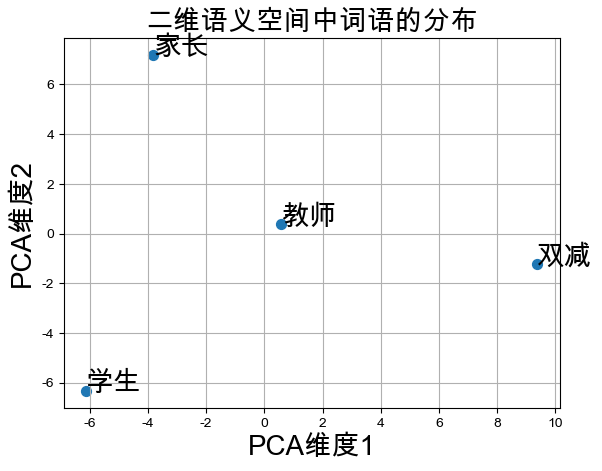

In [32]:
# 可视化

words = ['双减', '学生', '家长', '教师']
vectors = [model.wv[word] for word in words]

from sklearn.decomposition import PCA     # 语义空间降维，用于展示词语在二维空间的相对位置

# 使用PCA进行降维
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(vectors)

import matplotlib.pyplot as plt     # 画图

# 绘制四个词语在二维空间的相对位置
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
plt.figure()

# 取PCA降维结果中所有行的第一列和第二列数据绘制散点图，设置点的大小为50
plt.scatter(pca_result[:, 0], pca_result[:, 1], s = 50)

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize = 20)

plt.xlabel('PCA维度1', fontsize = 20)
plt.ylabel('PCA维度2', fontsize = 20)
plt.title('二维语义空间中词语的分布', fontsize = 20)
plt.grid(True)
plt.show()